### Package Installation and Preparation

1.  **Exploratory Data Analysis (EDA):**
   - **xarray:** For working with multi-dimensional labeled arrays, especially for handling NetCDF files.
   - **NumPy:** For numerical operations and array manipulations.ns.
   - **Pandas:** For data manipulation and analysis.
   - **Matplotlib and Seaborn:** For data visualization and statistical graphics.

```bash
pip install xarray numpy pandas matplotlib seaborn
```

2. **Investigate Temporal Patterns, Trends, and Relationships:**
   - **xarray:** For time-series analysis and handling multi-dimensional data.
   - **Matplotlib and Seaborn:** For time-series plotting and visualization.

```bash
pip install xarray matplotlib seaborn
```

3. **Correlation and Regression:**
   - **xarray:** For handling and analyzing multi-dimensional data.
   - **SciPy:** For statistical analysis, including correlation and regression.

```bash
pip install xarray scipy
```

4. **GIS Tools for Spatial Analysis:**
   - **Geopandas:** For working with geospatial data in a Pandas-like environment.
   - **Folium:** For creating interactive leaflet maps.
   - **Shapely:** For geometry operations.

```bash
pip install geopandas folium shapely
```

In [9]:
#!pip install xarray numpy pandas matplotlib seaborn scipy

In [6]:
#!pip install geopandas folium shapely

In [19]:
#!pip install toolz

In [26]:
# !pip install cartopy

### Data Preparation


For handling NetCDF files, xarray is particularly powerful and integrates well with other scientific libraries. Here's a basic example of how you might use xarray to find the difference between V wind at 200 hPa and 800 hPa levels:

```python
import xarray as xr

# Load NetCDF data using xarray
wind_v_200hpa = xr.open_dataset('path/to/wind_v_200hpa.nc')['v_component_of_wind']
wind_v_850hpa = xr.open_dataset('path/to/wind_v_850hpa.nc')['v_component_of_wind']

# Calculate the vertical wind shear
vertical_wind_shear = wind_v_200hpa - wind_v_800hpa
```

### CMIP5 Dataset

In [1]:
import xarray as xr

#### Vertical Wind Component

In [2]:
## Vertical Wind Component 5 years each from 2006 to 2020
wind_v_06_10 = xr.open_dataset('data/CMIP5/v_wind/va_Amon_GFDL-CM2p1_rcp45_r10i1p1_200601-201012.nc')
wind_v_11_15 = xr.open_dataset('data/CMIP5/v_wind/va_Amon_GFDL-CM2p1_rcp45_r10i1p1_201101-201512.nc')
wind_v_16_20 = xr.open_dataset('data/CMIP5/v_wind/va_Amon_GFDL-CM2p1_rcp45_r10i1p1_201601-202012.nc')

## merge data into one array
wind_vc = xr.concat([wind_v_06_10, wind_v_11_15, wind_v_16_20], dim = "time")

In [23]:
#print(wind_vc)

In [3]:
# Define the bounding box coordinates for West Africa
lon_min, lat_min, lon_max, lat_max = -20, -5, 25, 20

# Subset the dataset based on the bounding box
west_africa_data = wind_vc.sel(lon=slice(lon_min, lon_max), lat=slice(lat_min, lat_max))

In [32]:
# Print the updated dataset
#print(west_africa_data)

In [43]:
#west_africa_data

In [4]:
# Extract data for the 200 hPa and 800 hPa levels
wind_200hpa = west_africa_data.sel(plev=20000)  # 200 hPa level
wind_850hpa = west_africa_data.sel(plev=85000)  # 800 hPa level

# Calculate vertical wind shear by subtracting values at 800 hPa from values at 200 hPa
vertical_wind_shear = wind_200hpa.va - wind_850hpa.va

In [155]:
# Print the resulting dataset
# print(vertical_wind_shear)

In [63]:
#vertical_wind_shear

#### Precipitatlon Flux

In [5]:
## Precipitation Flux
pr_06_10 = xr.open_dataset('data/CMIP5/precip/pr_Amon_GFDL-CM2p1_rcp45_r10i1p1_200601-201012.nc')
pr_11_15 = xr.open_dataset('data/CMIP5/precip/pr_Amon_GFDL-CM2p1_rcp45_r10i1p1_201101-201512.nc')
pr_16_20 = xr.open_dataset('data/CMIP5/precip/pr_Amon_GFDL-CM2p1_rcp45_r10i1p1_201601-202012.nc')

# merge data into an array
precip = xr.concat([pr_06_10, pr_11_15, pr_16_20], dim = "time")

In [6]:
# Define the bounding box coordinates for West Africa
lon_min, lat_min, lon_max, lat_max = -20, -5, 25, 20

# Subset the dataset based on the bounding box
west_africa_data = precip.sel(lon=slice(lon_min, lon_max), lat=slice(lat_min, lat_max))

In [7]:
# Extract precipitation data
pr_flux = west_africa_data.pr

In [64]:
#print(pr_flux)

In [156]:
# pr_flux

### Exploratory Data Analysis (EDA):

In [8]:
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import pandas as pd
import matplotlib.dates as mdates
import numpy as np
import seaborn as sns
import os

In [120]:
#print(len(time_values))
#print(len(wind_shear_values))
#mdates.num2date(time_values)

### Create Directory for Saving Figures

In [9]:
import os

# Create a directory named 'figures' if it doesn't exist
save_dir = 'figures'
os.makedirs(save_dir, exist_ok=True)

# Create a directory named 'CMIP5' if it doesn't exist
save_dir = 'figures/CMIP5'
os.makedirs(save_dir, exist_ok=True)

In [10]:
from plot_utils import plot_time_series

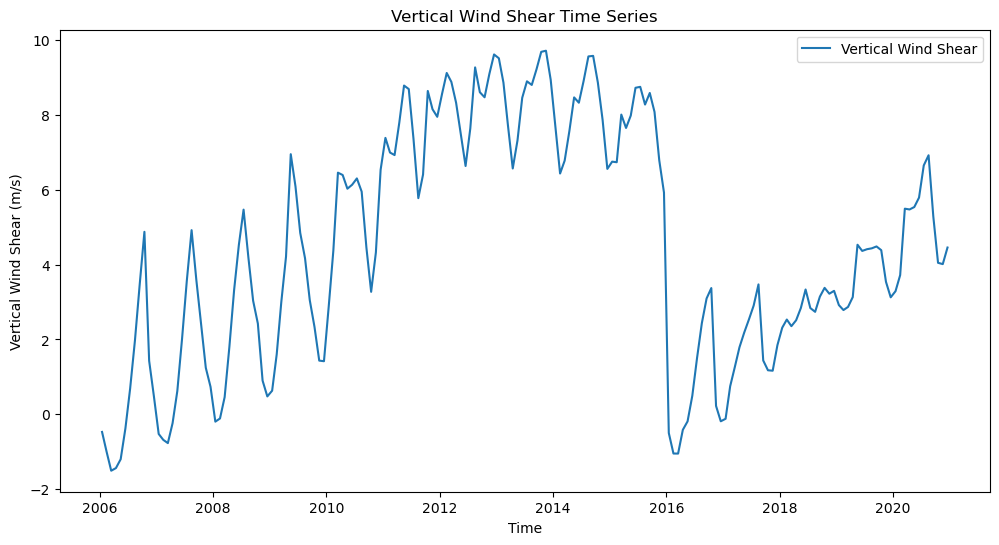

In [12]:
# Vertical Wind Shear
plot_time_series(vertical_wind_shear.time.values, vertical_wind_shear.values.flatten(), 'Vertical Wind Shear', save_dir,'m/s')


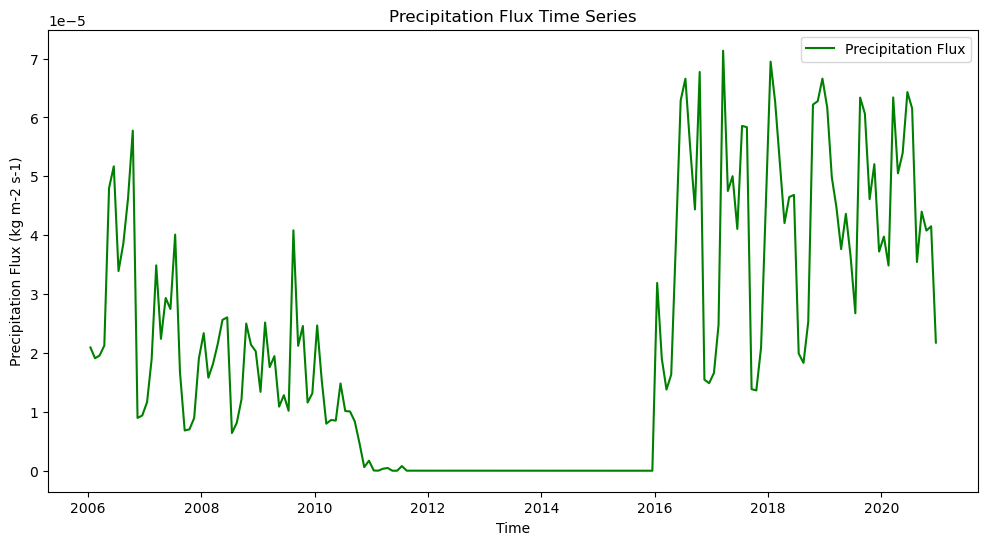

In [13]:
# Precipitation Flux
plot_time_series(pr_flux.time.values, pr_flux.values.flatten(), 'Precipitation Flux', save_dir, 'kg m-2 s-1', color='green')

In [15]:
from plot_utils import plot_dual_time_series

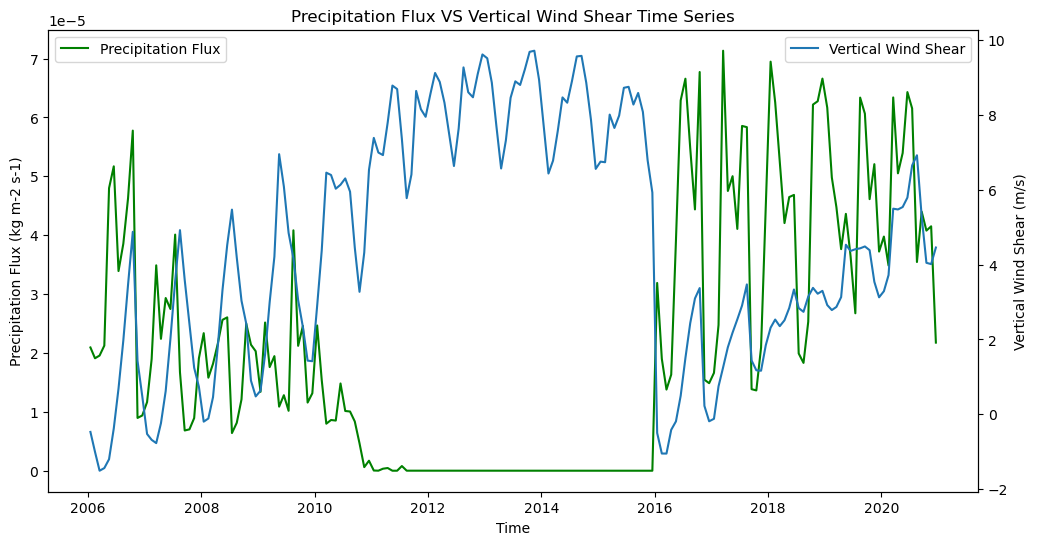

In [16]:
plot_dual_time_series(
    pr_flux.time.values, pr_flux.values.flatten(), 'Precipitation Flux', 'green',
    vertical_wind_shear.time.values, vertical_wind_shear.values.flatten(), 'Vertical Wind Shear', None,
    save_dir, unit_primary='kg m-2 s-1', unit_secondary='m/s'
)


### Investigate Temporal Patterns and Relationships:

In [17]:
from plot_utils import plot_correlation_heatmap

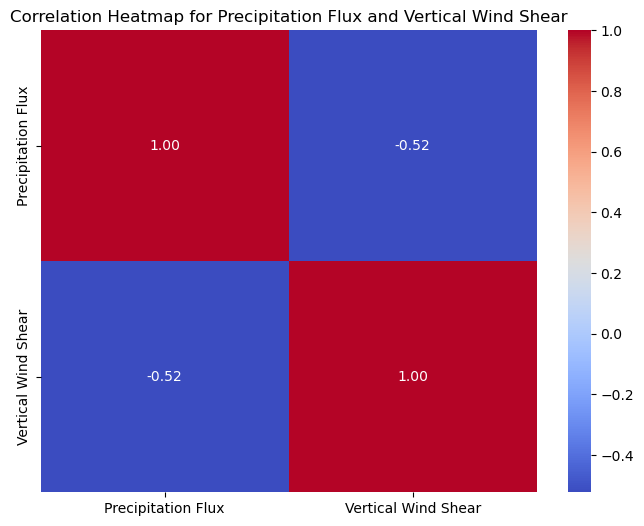

In [18]:
plot_correlation_heatmap(pr_flux, vertical_wind_shear, save_dir, 'Precipitation Flux', 'Vertical Wind Shear')


The correlation matrix shows the correlation coefficients between the Precipitation Flux and Vertical Wind Shear. Each number in the matrix represents the strength and direction of the linear relationship between the corresponding variables.

Here's how to interpret the matrix:

1. **Correlation between Precipitation Flux and Itself:**
   - The correlation of a variable with itself is always 1.0 (perfect positive correlation). In this case, the correlation between Precipitation Flux and Precipitation Flux is 1.0.

2. **Correlation between Precipitation Flux and Vertical Wind Shear:**
   - The correlation coefficient between Precipitation Flux and Vertical Wind Shear is approximately -0.52.
   - The negative sign indicates a negative correlation, which means that as one variable increases, the other tends to decrease.
   - The magnitude (-0.52) suggests a moderate strength of the correlation. In statistical terms, this suggests a moderate negative linear relationship between Precipitation Flux and Vertical Wind Shear.

3. **Correlation between Vertical Wind Shear and Itself:**
   - Similar to Precipitation Flux, the correlation of Vertical Wind Shear with itself is 1.0.

In summary, the correlation matrix indicates that there is a moderate negative correlation between Precipitation Flux and Vertical Wind Shear. It implies that, on average, when Precipitation Flux increases, Vertical Wind Shear tends to decrease, and vice versa. Keep in mind that correlation does not imply causation; it only measures the strength and direction of linear relationships.

### Statistical Analyses:

In [19]:
from plot_utils import visualize_linear_regression

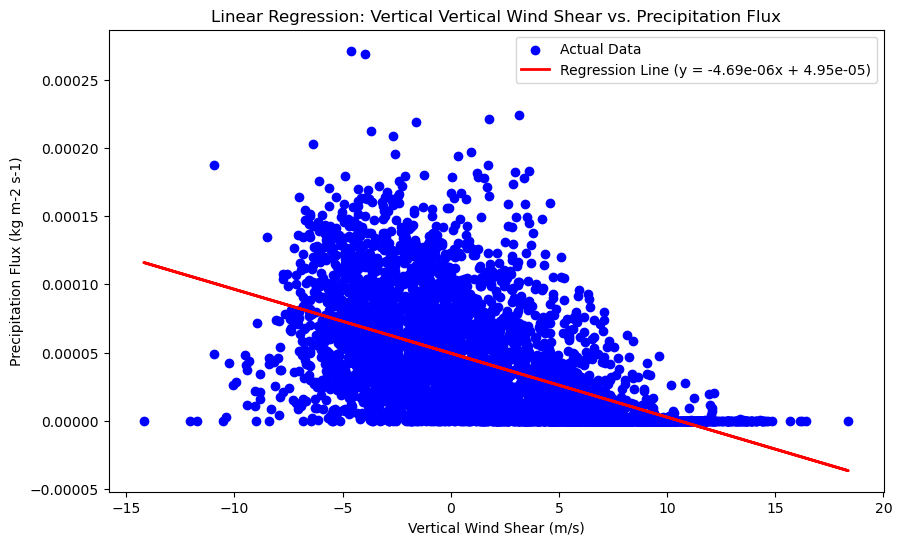

In [20]:
visualize_linear_regression(vertical_wind_shear, pr_flux, 
                            test_size=0.2, random_state=42, 
                            save_dir=save_dir, x_lab='Vertical Wind Shear', y_lab='Precipitation Flux', x_unit='(m/s)', y_unit='(kg m-2 s-1)')


In [21]:
from geoplot_utils import plot_cartopy

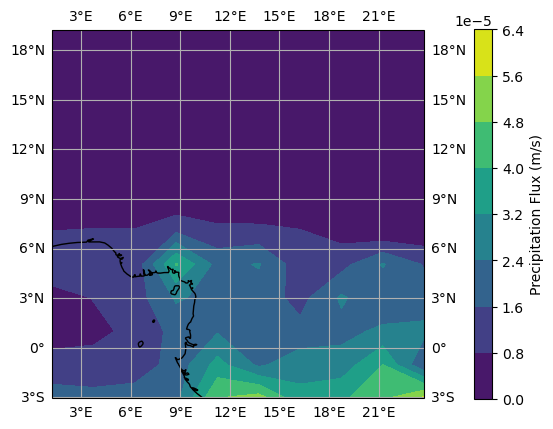

In [22]:
plot_cartopy(pr_flux, 'Precipitation Flux', save_dir=save_dir, unit='(m/s)')

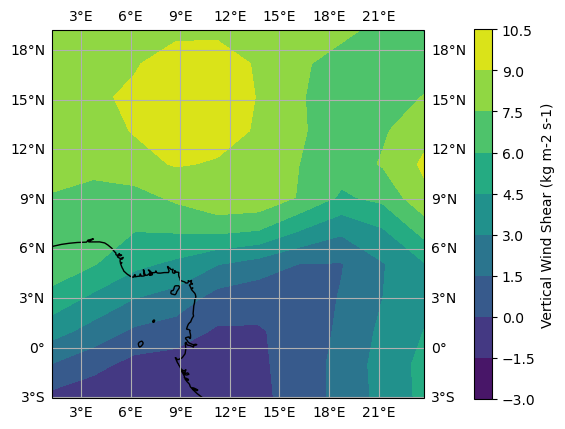

In [23]:
plot_cartopy(vertical_wind_shear, 'Vertical Wind Shear', save_dir=save_dir, unit='(kg m-2 s-1)')

In [24]:
from geoplot_utils import plot_cartopy_periodic

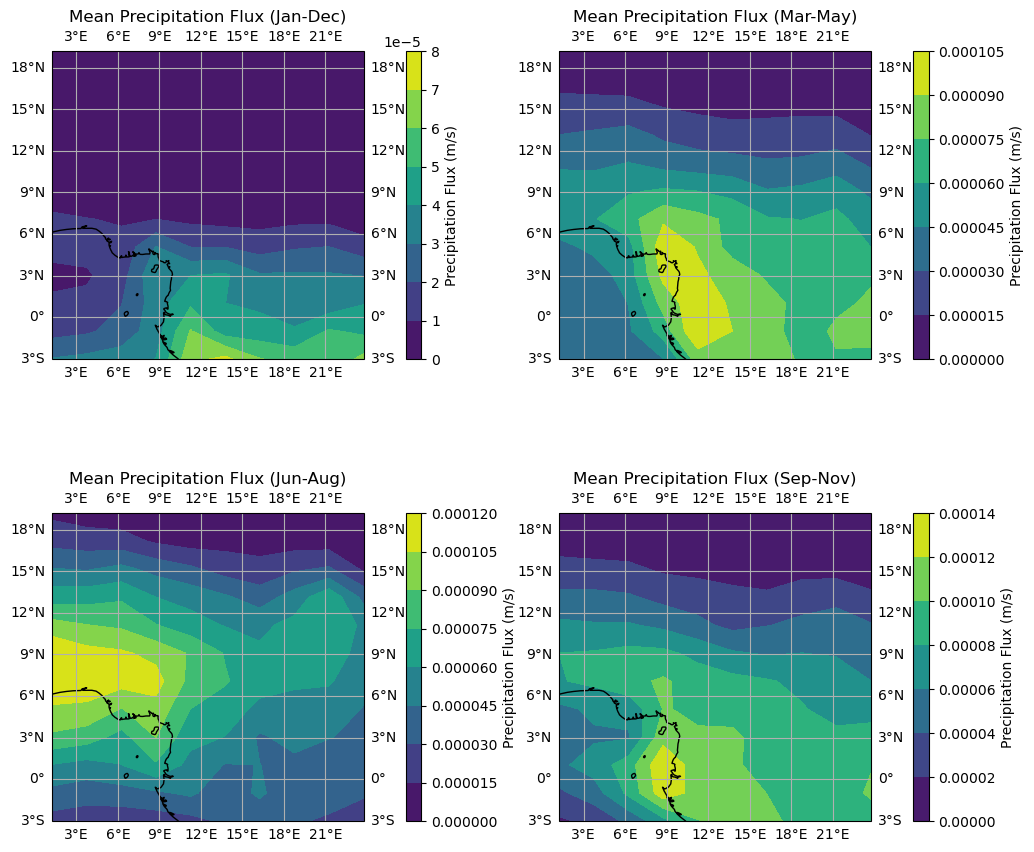

In [25]:
plot_cartopy_periodic(pr_flux, 'Precipitation Flux', save_dir=save_dir, unit='(m/s)')

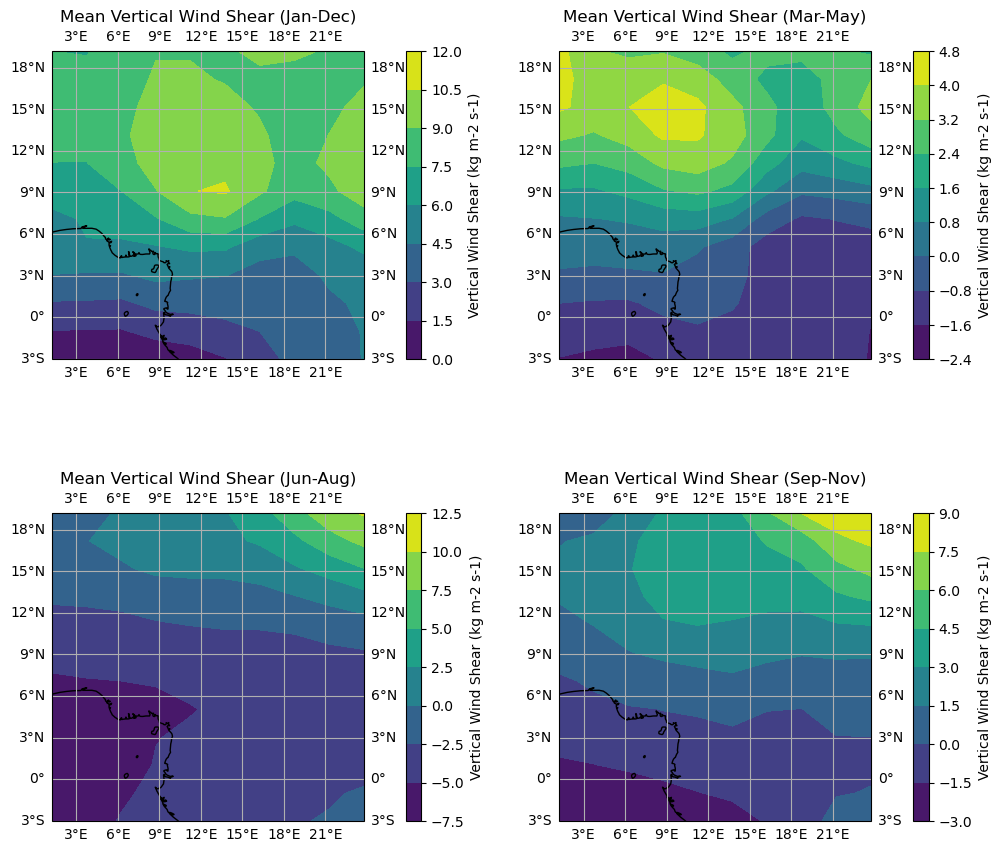

In [26]:
plot_cartopy_periodic(vertical_wind_shear, 'Vertical Wind Shear', save_dir=save_dir, unit='(kg m-2 s-1)')

In [27]:
from geoplot_utils import plot_cartopy_monthly

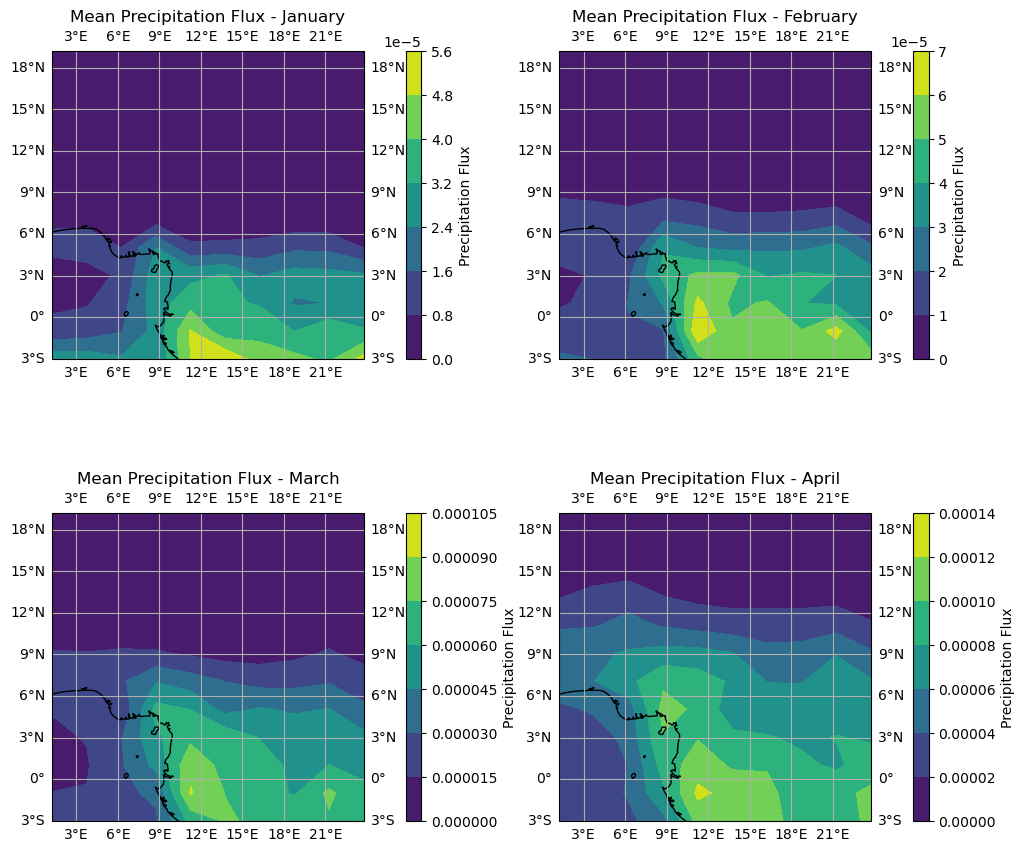

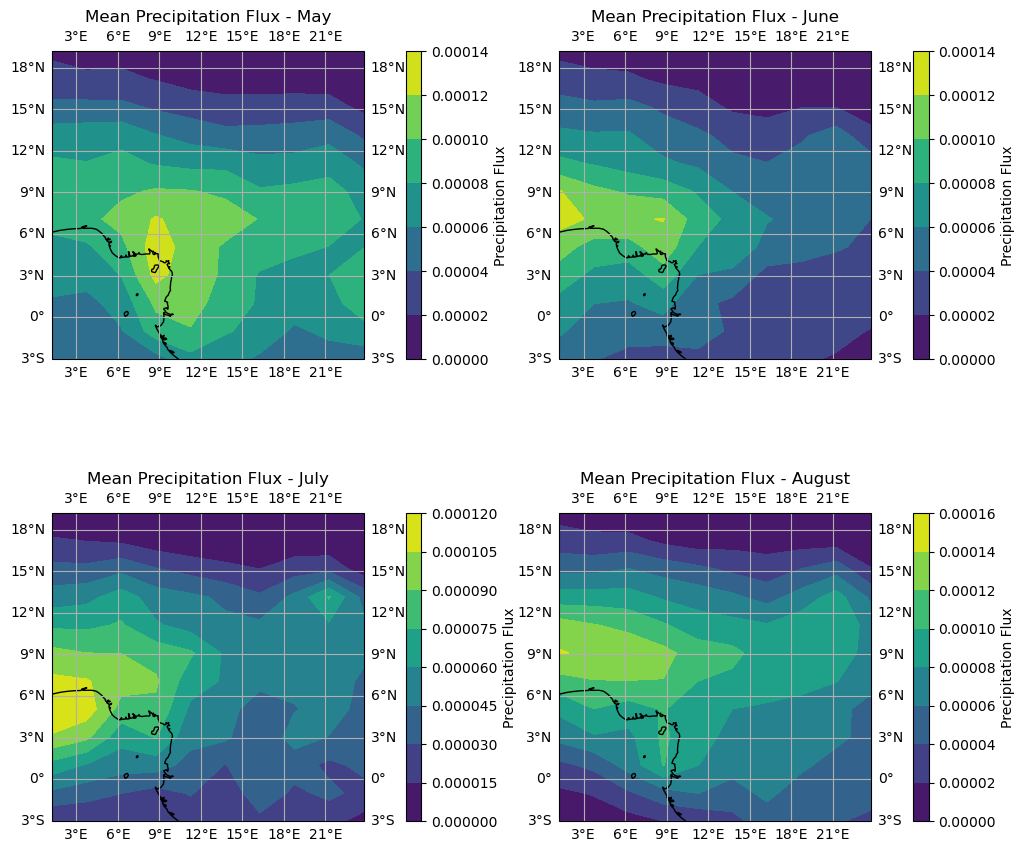

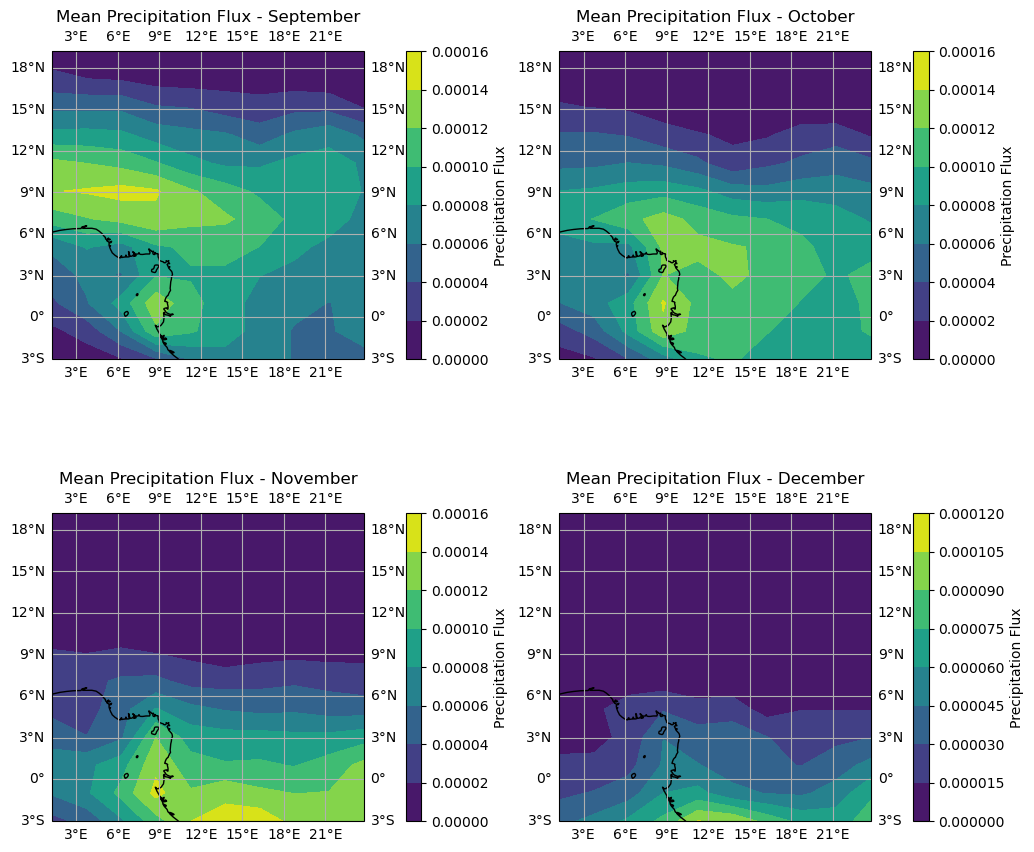

In [31]:
plot_cartopy_monthly(pr_flux, 'Precipitation Flux', save_dir=save_dir, unit='(m/s)')


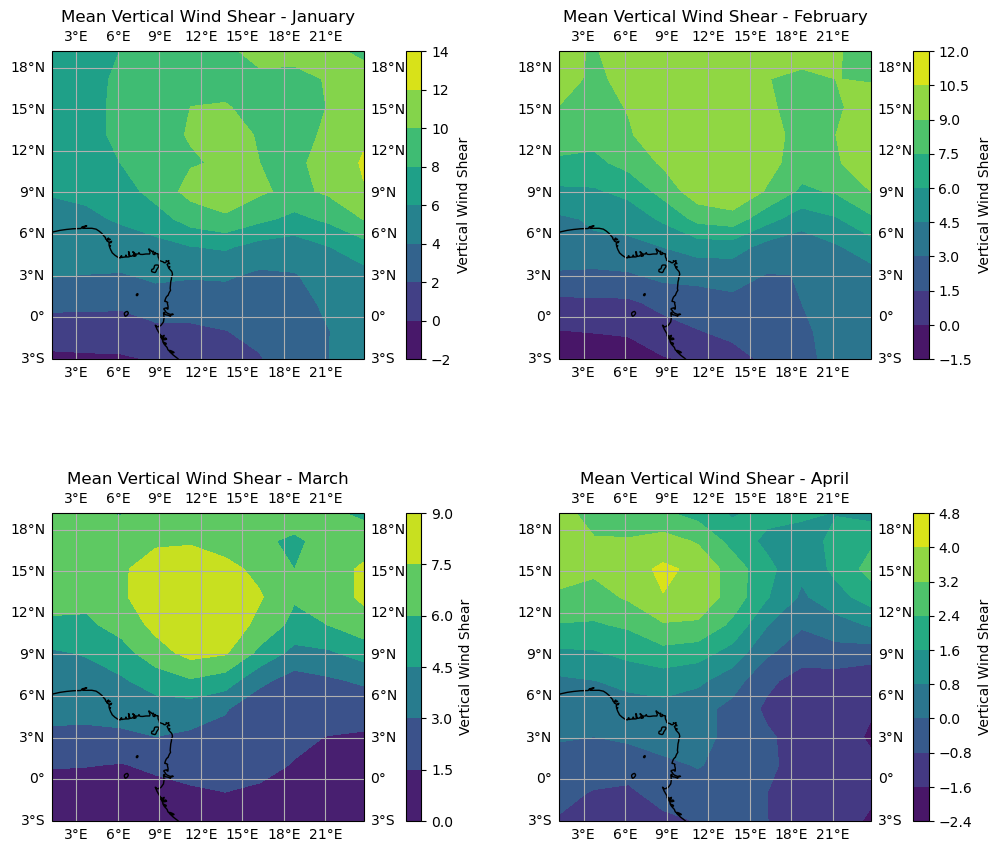

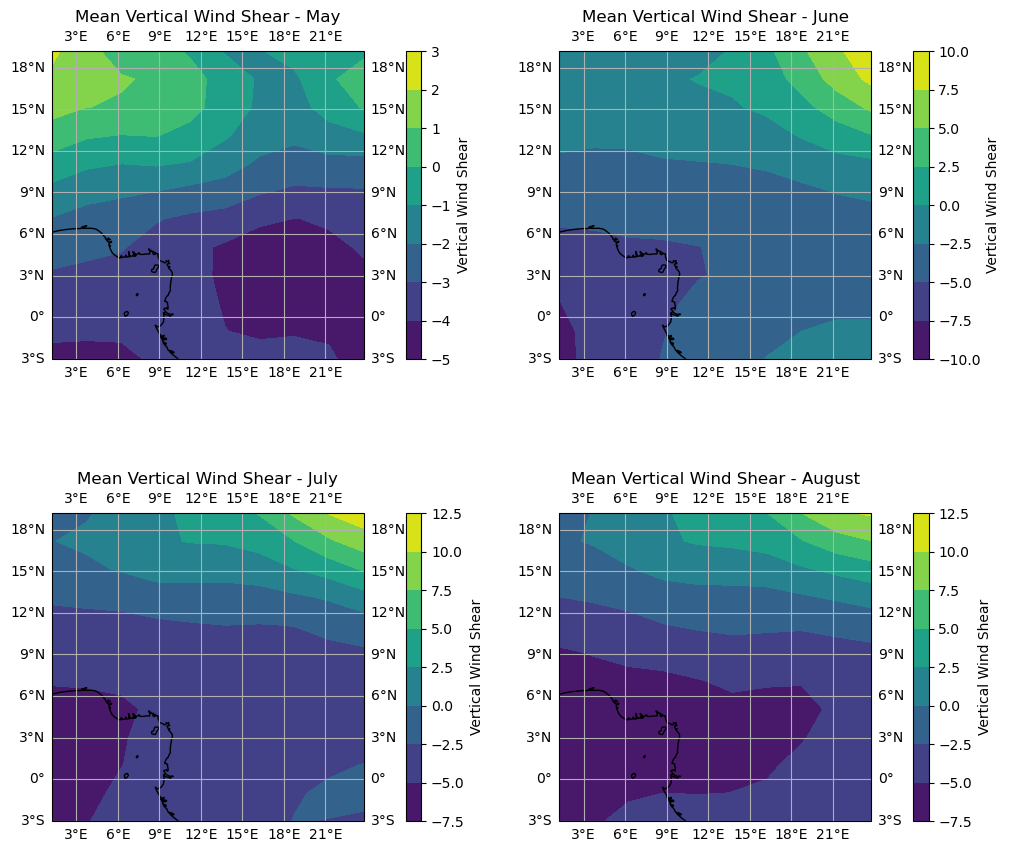

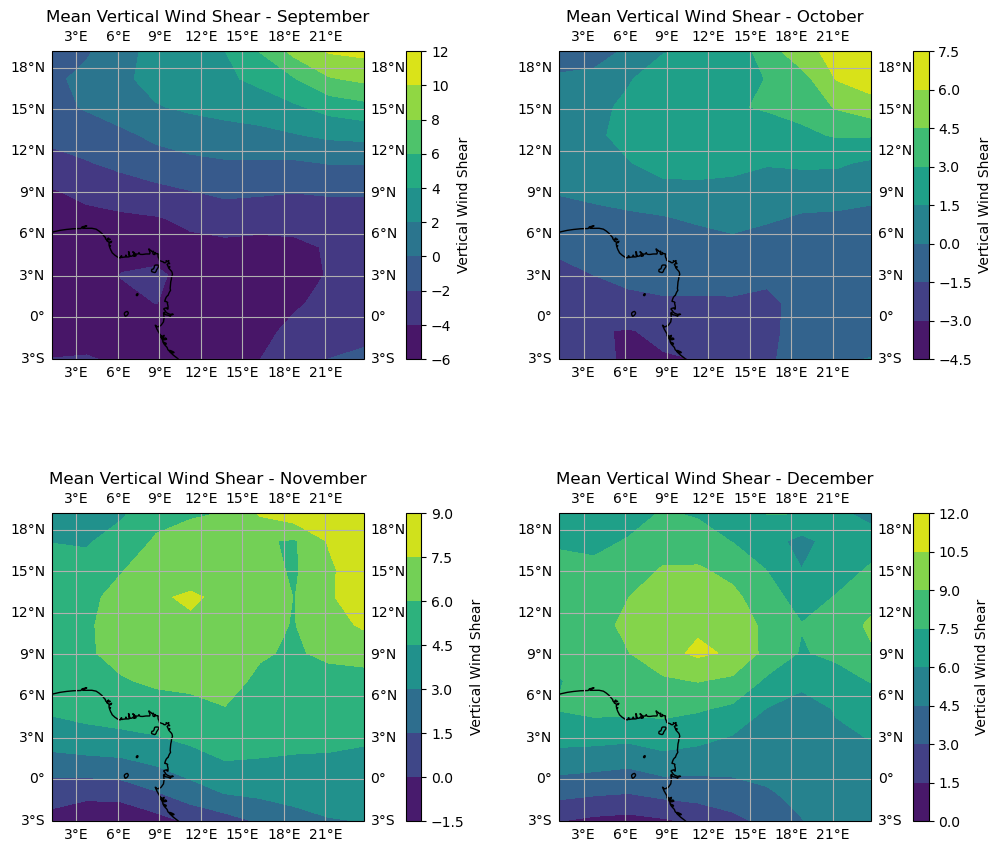

In [30]:
plot_cartopy_monthly(vertical_wind_shear, 'Vertical Wind Shear', save_dir=save_dir, unit='(kg m-2 s-1)')